In [58]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from fastf1.core import Laps
from datetime import datetime
from matplotlib.collections import LineCollection
from datetime import timedelta
from fastf1 import utils
import mplcyberpunk
from timple.timedelta import strftimedelta

In [2]:
year=int(input('Enter Year'))
gp=input('Enter the Grand Prix Location')
sessiontypechoice=int(input('Enter 1 for qualifying or 2 for race'))
if sessiontypechoice == 1:
    sessiontype='Q'
elif sessiontypechoice == 2:
    sessiontype='R'
else:
    print("Unknown choice")

session = ff1.get_session(year, gp,sessiontype)
session.load()

if sessiontype=="Q":
    choicedrivers=int(input("Enter 1 for the comparision between top 2 drivers \n Enter 2 for the comparision between 2 specified drivers"))
    if choicedrivers==1: 
        quali_results=session.results
        quali_results=quali_results[['DriverNumber','BroadcastName','Abbreviation','TeamName','Position','Q1','Q2','Q3']]
        quali_results[['Abbreviation']]
        x=quali_results['Abbreviation'].iloc[0]
        y=quali_results['Abbreviation'].iloc[1]
        driver1=x
        driver2=y

    else:
        driver1=input("Enter the first driver initials")
        driver2=input("Enter the second driver initials")
else:
    driver1=input("Enter the first driver initials")
    driver2=input("Enter the second driver initials")

api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

core           INFO 	Loading data for Canadian Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position data is incomplete!
api            INFO 	Fetching w

In [3]:
laps=session.load_laps(with_telemetry=True)

laps_1=laps.pick_driver(driver1)
laps_2=laps.pick_driver(driver2)
if sessiontype == "Q":
    s1=laps_1.pick_fastest()
    s2=laps_2.pick_fastest()
    if s1.LapTime < s2.LapTime:
        fastest_1=s1
        fastest_2=s2
    else:
        fastest_1=s2
        fastest_2=s1
else:
    fastest_1=laps_1.pick_fastest()
    fastest_2=laps_2.pick_fastest()
    

c:\Users\Rajup\AppData\Local\Programs\Python\Python310\lib\site-packages\fastf1\core.py:1127: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Canadian Grand Prix - Race [v2.2.8]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNI

In [4]:
driver1=driver1.upper()
driver2=driver2.upper()

In [5]:
driver3="HAM"

laps_3=laps.pick_driver(driver3)
driver3_racetimes=pd.DataFrame(laps_3.pick_accurate())

In [6]:
driver3_racetimes

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
141,0 days 01:04:59.778000,44,0 days 00:01:19.549000,2,1,NaT,NaT,0 days 00:00:22.500000,0 days 00:00:25.467000,0 days 00:00:31.582000,...,False,MEDIUM,2.0,True,0 days 01:03:40.229000,Mercedes,HAM,1,True,2022-06-19 18:04:40.242
142,0 days 01:06:18.791000,44,0 days 00:01:19.013000,3,1,NaT,NaT,0 days 00:00:22.240000,0 days 00:00:25.537000,0 days 00:00:31.236000,...,False,MEDIUM,3.0,True,0 days 01:04:59.778000,Mercedes,HAM,1,True,2022-06-19 18:05:59.791
143,0 days 01:07:37.949000,44,0 days 00:01:19.158000,4,1,NaT,NaT,0 days 00:00:22.308000,0 days 00:00:25.452000,0 days 00:00:31.398000,...,False,MEDIUM,4.0,True,0 days 01:06:18.791000,Mercedes,HAM,1,True,2022-06-19 18:07:18.804
144,0 days 01:08:56.609000,44,0 days 00:01:18.660000,5,1,NaT,NaT,0 days 00:00:22.247000,0 days 00:00:25.280000,0 days 00:00:31.133000,...,False,MEDIUM,5.0,True,0 days 01:07:37.949000,Mercedes,HAM,1,True,2022-06-19 18:08:37.962
145,0 days 01:10:15.200000,44,0 days 00:01:18.591000,6,1,NaT,NaT,0 days 00:00:22.028000,0 days 00:00:25.260000,0 days 00:00:31.303000,...,False,MEDIUM,6.0,True,0 days 01:08:56.609000,Mercedes,HAM,1,True,2022-06-19 18:09:56.622
146,0 days 01:11:33.586000,44,0 days 00:01:18.386000,7,1,NaT,NaT,0 days 00:00:21.918000,0 days 00:00:25.197000,0 days 00:00:31.271000,...,False,MEDIUM,7.0,True,0 days 01:10:15.200000,Mercedes,HAM,1,True,2022-06-19 18:11:15.213
147,0 days 01:12:51.749000,44,0 days 00:01:18.163000,8,1,NaT,NaT,0 days 00:00:21.869000,0 days 00:00:24.990000,0 days 00:00:31.304000,...,False,MEDIUM,8.0,True,0 days 01:11:33.586000,Mercedes,HAM,2,True,2022-06-19 18:12:33.599
150,0 days 01:17:48.425000,44,0 days 00:01:18.734000,11,2,NaT,NaT,0 days 00:00:22.096000,0 days 00:00:25.193000,0 days 00:00:31.445000,...,False,HARD,2.0,True,0 days 01:16:29.691000,Mercedes,HAM,1,True,2022-06-19 18:17:29.704
151,0 days 01:19:06.612000,44,0 days 00:01:18.187000,12,2,NaT,NaT,0 days 00:00:22.011000,0 days 00:00:25.015000,0 days 00:00:31.161000,...,False,HARD,3.0,True,0 days 01:17:48.425000,Mercedes,HAM,1,True,2022-06-19 18:18:48.438
152,0 days 01:20:24.585000,44,0 days 00:01:17.973000,13,2,NaT,NaT,0 days 00:00:21.800000,0 days 00:00:25.030000,0 days 00:00:31.143000,...,False,HARD,4.0,True,0 days 01:19:06.612000,Mercedes,HAM,1,True,2022-06-19 18:20:06.625


In [7]:
driver1_racetimes=pd.DataFrame(laps_1.pick_accurate())
driver2_racetimes=pd.DataFrame(laps_2.pick_accurate())



driver1_racetimes
#average race pace



n=timedelta(seconds=0)




for index, row in driver1_racetimes.iterrows():
    
    n+=row["LapTime"]
   
print(n)

print(driver1+"  : Race Pace : "+str(n/len(driver1_racetimes)))


from datetime import timedelta

n1=timedelta(seconds=0)
for index, row in driver2_racetimes.iterrows():
    
    n1+=row["LapTime"]
   
print(n1)


print(driver2+"  : Race Pace : "+str(n1/len(driver2_racetimes)))

driver2
laps_1.pick_tyre("HARD")




n2=timedelta(seconds=0)
for index, row in driver3_racetimes.iterrows():
    
    n2+=row["LapTime"]
   
print(n2)


print(driver3+"  : Race Pace : "+str(n2/len(driver3_racetimes)))


0 days 01:12:06.970000
VER  : Race Pace : 0 days 00:01:17.267321428
0 days 01:13:27.971000
SAI  : Race Pace : 0 days 00:01:17.332824561
0 days 01:12:27.897000
HAM  : Race Pace : 0 days 00:01:17.641017857


In [8]:
sessiondf=pd.DataFrame(session.results)

In [9]:
drivernumber_list=sessiondf['DriverNumber'].tolist()

In [10]:
drivernumber_list

['1',
 '55',
 '44',
 '63',
 '16',
 '31',
 '77',
 '24',
 '14',
 '18',
 '3',
 '5',
 '23',
 '10',
 '4',
 '6',
 '20',
 '22',
 '47',
 '11']

In [11]:
fastest_1.Driver

'VER'

In [12]:
indexes=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [13]:
# Creating a new variable for each dataframe 
index=1
for i in drivernumber_list:
    
    temp=laps.pick_driver(i)
    temp2=temp.pick_fastest()
    getdrivername=temp2.Driver
    globals()['Driver%s' % index] = laps.pick_driver(getdrivername)
    # assigning only the laps which doesn't involve safety laps and involve 
    #also eliminates the in/out laps
    globals()['Driver%s' % index]=pd.DataFrame(globals()['Driver%s' % index].pick_accurate())
  
    index=index+1
   
    

In [14]:
driver1_racetimes
#average race pace

n=timedelta(seconds=0)

for index, row in driver1_racetimes.iterrows():
    
    n+=row["LapTime"]
   
print(n)

print(driver1+"  : Race Pace : "+str(n/len(driver1_racetimes)))
    

0 days 01:12:06.970000
VER  : Race Pace : 0 days 00:01:17.267321428


In [15]:
# Creating a list from 1 to 20 
# So that this can be used to loop from driver 1
looper = list(range(1,20+1))

In [47]:
# creation of empty dataframe for plotting purpose 
racepace_df=pd.DataFrame({'Driver':[],
                   'DriverNumber':[],
                   'RacePace':[],
                   'Team':[],
                   'TeamColor':[]})

In [48]:
# Creating a loop to iterate through all the drivers
#  and get their average race pace

for i in looper:
    globals()['n%s' % i]=timedelta(seconds=0)
    
    for index, row in globals()['Driver%s' % i].iterrows():
    
        globals()['n%s' % i]+=row["LapTime"]

    # get the driver names 
    driver_name=globals()['Driver%s' % i].Driver.head(1).tolist()
    driver_name=driver_name[0]
    # driver number
    driver_number=globals()['Driver%s' % i].DriverNumber.head(1).tolist()
    driver_number=driver_number[0]
    # driver team
    driver_team=globals()['Driver%s' % i].Team.head(1).tolist()
    driver_team=driver_team[0]
    # team color
    driver_team_color=ff1.plotting.team_color(driver_team)
    

    globals()['average_racepace%s' % driver_name]=(globals()['n%s' % i]/len(globals()['Driver%s' % i]))

    print("Average Race Pace of  "+driver_name+" in "+ session.event['EventName']+" : "+str(globals()['average_racepace%s' % driver_name]))
    #adding a row with the data
    data=[{'Driver': driver_name,'DriverNumber':driver_number,'RacePace':globals()['average_racepace%s' % driver_name],'Team':driver_team,'TeamColor': str(driver_team_color)}]
    # data added to DataFrame 
    racepace_df=racepace_df.append(data,ignore_index=True,sort=False)

Average Race Pace of  VER in Canadian Grand Prix : 0 days 00:01:17.267321428
Average Race Pace of  SAI in Canadian Grand Prix : 0 days 00:01:17.332824561
Average Race Pace of  HAM in Canadian Grand Prix : 0 days 00:01:17.641017857
Average Race Pace of  RUS in Canadian Grand Prix : 0 days 00:01:17.756945454
Average Race Pace of  LEC in Canadian Grand Prix : 0 days 00:01:18.373454545


C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Average Race Pace of  OCO in Canadian Grand Prix : 0 days 00:01:18.496620689
Average Race Pace of  BOT in Canadian Grand Prix : 0 days 00:01:18.769879310
Average Race Pace of  ZHO in Canadian Grand Prix : 0 days 00:01:18.822736842
Average Race Pace of  ALO in Canadian Grand Prix : 0 days 00:01:18.472631578
Average Race Pace of  STR in Canadian Grand Prix : 0 days 00:01:19.115872727
Average Race Pace of  RIC in Canadian Grand Prix : 0 days 00:01:19.137410714
Average Race Pace of  VET in Canadian Grand Prix : 0 days 00:01:18.908944444


C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Average Race Pace of  ALB in Canadian Grand Prix : 0 days 00:01:19.250892857
Average Race Pace of  GAS in Canadian Grand Prix : 0 days 00:01:19.037826923
Average Race Pace of  NOR in Canadian Grand Prix : 0 days 00:01:19.154890909
Average Race Pace of  LAT in Canadian Grand Prix : 0 days 00:01:19.929203703
Average Race Pace of  MAG in Canadian Grand Prix : 0 days 00:01:19.458872727


C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)
C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Average Race Pace of  TSU in Canadian Grand Prix : 0 days 00:01:19.345170731
Average Race Pace of  MSC in Canadian Grand Prix : 0 days 00:01:19.507533333
Average Race Pace of  PER in Canadian Grand Prix : 0 days 00:01:19.725333333


C:\Users\Rajup\AppData\Local\Temp\ipykernel_30912\163757197.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  racepace_df=racepace_df.append(data,ignore_index=True,sort=False)


In [33]:
x=Driver1.Team[1]

In [49]:
racepace_df

,Driver,DriverNumber,RacePace,Team,TeamColor
0,VER,1,0 days 00:01:17.267321428,Red Bull Racing,#0600ef
1,SAI,55,0 days 00:01:17.332824561,Ferrari,#dc0000
2,HAM,44,0 days 00:01:17.641017857,Mercedes,#00d2be
3,RUS,63,0 days 00:01:17.756945454,Mercedes,#00d2be
4,LEC,16,0 days 00:01:18.373454545,Ferrari,#dc0000
5,OCO,31,0 days 00:01:18.496620689,Alpine,#0090ff
6,BOT,77,0 days 00:01:18.769879310,Alfa Romeo,#900000
7,ZHO,24,0 days 00:01:18.822736842,Alfa Romeo,#900000
8,ALO,14,0 days 00:01:18.472631578,Alpine,#0090ff
9,STR,18,0 days 00:01:19.115872727,Aston Martin,#006f62


In [51]:
# add colors to a list of all the teams
team_colors = list()
for index,lap in racepace_df.iterrows():
    colors=lap["TeamColor"]
    team_colors.append(colors)

In [53]:
fastest_pace=timedelta(seconds=0)
tempss=timedelta(seconds=0)

In [54]:

for index,pace in racepace_df.iterrows():
    nexts=pace['RacePace']
    if (fastest_pace==tempss) or (fastest_pace > nexts):
        fastest_pace = pace['RacePace']
    

In [55]:
fastest_pace

Timedelta('0 days 00:01:17.267321428')

In [56]:
racepace_df['Delta']=racepace_df['RacePace'] - fastest_pace

In [59]:
path="D:/Python Projects/f1analysis/Visualisations/"

In [57]:
racepace_df

,Driver,DriverNumber,RacePace,Team,TeamColor,Delta
0,VER,1,0 days 00:01:17.267321428,Red Bull Racing,#0600ef,0 days 00:00:00
1,SAI,55,0 days 00:01:17.332824561,Ferrari,#dc0000,0 days 00:00:00.065503133
2,HAM,44,0 days 00:01:17.641017857,Mercedes,#00d2be,0 days 00:00:00.373696429
3,RUS,63,0 days 00:01:17.756945454,Mercedes,#00d2be,0 days 00:00:00.489624026
4,LEC,16,0 days 00:01:18.373454545,Ferrari,#dc0000,0 days 00:00:01.106133117
5,OCO,31,0 days 00:01:18.496620689,Alpine,#0090ff,0 days 00:00:01.229299261
6,BOT,77,0 days 00:01:18.769879310,Alfa Romeo,#900000,0 days 00:00:01.502557882
7,ZHO,24,0 days 00:01:18.822736842,Alfa Romeo,#900000,0 days 00:00:01.555415414
8,ALO,14,0 days 00:01:18.472631578,Alpine,#0090ff,0 days 00:00:01.205310150
9,STR,18,0 days 00:01:19.115872727,Aston Martin,#006f62,0 days 00:00:01.848551299


In [ ]:
deltalist=list()
for index, deltas in racepace_df.iterrows():
    delta=deltas['Delta']
    delta=strftimedelta(delta, '%s.%ms')

    deltalist.append(delta)


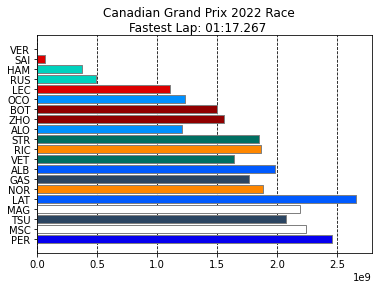

In [65]:
fig, ax = plt.subplots()
ax.barh(racepace_df.index, racepace_df['Delta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(racepace_df.index)
ax.set_yticklabels(racepace_df['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(fastest_pace, '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session.name}\n"
             f"Fastest Lap: {lap_time_string} ")
fig.savefig(path+session.event['EventName']+"racepace.jpg")

plt.show()

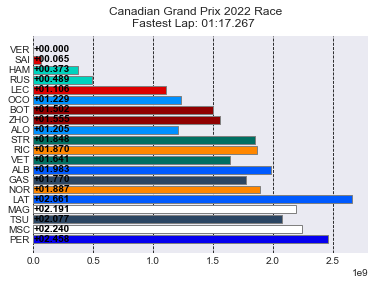

In [118]:
fig, ax = plt.subplots()

ax.barh(racepace_df.index, racepace_df['Delta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(racepace_df.index)
ax.set_yticklabels(racepace_df['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
lap_time_string = strftimedelta(fastest_pace, '%m:%s.%ms')

for i, v in enumerate(deltalist):
    ax.text(0.25, i + .25, "+" +str(v),
            color = 'black', fontweight = 'bold')

plt.suptitle(f"{session.event['EventName']} {session.event.year} {session.name}\n"
             f"Fastest Lap: {lap_time_string} ")

fig.savefig(path+session.event['EventName']+"racepace.jpg",dpi=600)
plt.show()


In [115]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

list